Importing the required libraries

In [244]:
library("twitteR")
library("ggmap") 
library("maptools") 
library("maps")
library("RSQLite")
library("plyr")

Authentication with OAuth

In [235]:
setup_twitter_oauth("","","","")

[1] "Using direct authentication"


Registering the created Sqlite file to store the tweets

In [256]:
register_sqlite_backend("Tweets.sqlite")

Taking the user input and storing it in the queryTerm variable

In [ ]:
#queryTerm <- "#SuperbowlSunday"
#queryTerm <- "#PepsiHalftime"
#queryTerm <- "#LadyGaga"
#queryTerm <- "#Patriots"
queryTerm <- "#NFL"

Searching for the tweets related to the query term and storing it in the queryResults variable

In [74]:
queryResults <- searchTwitter(queryTerm, n = 5000)

Storing tweets in the created database

In [ ]:
store_tweets_db(queryResults)

Load the tweets from the database and store it in the from_db variable

In [257]:
from_db = load_tweets_db()

Converting the list to a dataframe using the twListToDF function

In [9]:
tweetsFrame <- twListToDF(from_db)

Get the details of the users from the tweets frame

In [12]:
userInfo <- lookupUsers(tweetsFrame$screenName)  # Batch lookup of user info

Converting the users to a data frame

In [13]:
userFrame <- twListToDF(userInfo)  # Convert to a nice dF

Filtering the unique users and storing it in another dataframe

In [14]:
uniqueUserFrame <- unique(userFrame)

To display the count of unique users

In [15]:
nrow(uniqueUserFrame)

[1] 9927

In [ ]:
validUsers <- !is.na(userFrame$location)

To display the count of unique users with location available

In [20]:
length(validUsers)

[1] 9927

Saving the data frame of unique users

In [17]:
saveRDS(uniqueUserFrame, file="uniqueUserFrame1.Rds")

Reading the saved dataframe and storing it in a separate variable

In [252]:
userFrame <- readRDS("uniqueUserFrame1.Rds")

Deleting the rows whose location is not available

In [34]:
userFrameModified <- na.omit(userFrame$location)

Getting the users with a valid location information

In [35]:
validUsers <- !is.na(userFrameModified) 

Display the length of the valid users

In [247]:
length(validUsers)

[1] 9927

Store the subset of userFrameModified to query the geocode

In [41]:
userFrame1 <- userFrameModified[1:999]

Querying the geocode for latitude,longitude details of the subset frame

In [87]:
locationsTest <- geocode(userFrame1)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Diego,%20CA%20%E2%9C%88%20Houston,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=France&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Poland%20%E2%9C%88%20The%20Netherlands%20%E2%9C%88%20USA&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "Poland ✈ The Netherlands ✈ USA"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=United%20Kingdom&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%E9%AD%94%E6%B3%95%E3%81%A3%E3%81%A6%E3%81%84%E3%81%84%E3%82%88%E3%81%AD&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "魔法っていいよね"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=DKI%20Jakarta,%20Indonesia&sensor=false
Information from URL : http://m

Saving the subset of users locations to a temporary file to merge later

In [90]:
saveRDS(locationsTest, file="locationsTest1.Rds")

Store the subset of userFrameModified to query the geocode

In [116]:
userFrame2 <- userFrameModified[1000:2000]

Querying the geocode for latitude,longitude details of the subset frame

In [117]:
locationsTest2 <- geocode(userFrame2)  # Use amazing API to guess

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=zeeboo&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Colombia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%C2%ABmaybe%20you%20could%20love%20me%C2%BB&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "«maybe you could love me»"”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Reynosa,%20Tamaulipas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Distrito%20Federal,%20Mexico&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=353%20Island%20Dr%20Madison%20WI%2053705&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=gym&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Republic%20of%2

Saving the subset of users locations to a temporary file to merge later

In [118]:
saveRDS(locationsTest2, file="locationsTest2.Rds")

Store the subset of userFrameModified to query the geocode

In [127]:
userFrame3 <- userFrameModified[2001:3000]

To check the number of geocode queries left

In [128]:
geocodeQueryCheck()

1363 geocoding queries remaining.


Querying the geocode for latitude,longitude details of the subset frame

In [129]:
locationsTest3 <- geocode(userFrame3)  # Use amazing API to guess

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Joanne&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Greece&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Venus&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brazil&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Back%20in%20Brooklyn&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Macei%C3%B3%20Alagoas%20Brazil&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Macap%C3%A1/AP&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=coolin&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fortaleza,%20Brasil&sensor=false
Information from URL : http://maps.googlea

Saving the subset of users locations to a temporary file to merge later

In [130]:
saveRDS(locationsTest3, file="locationsTest3.Rds")

To check the number of geocode queries left

In [131]:
geocodeQueryCheck()

732 geocoding queries remaining.


Store the subset of userFrameModified to query the geocode

In [132]:
userFrame4 <- userFrameModified[3001:3500]

Querying the geocode for latitude,longitude details of the subset frame

In [133]:
locationsTest4 <- geocode(userFrame4)  # Use amazing API to guess

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=LA%E2%9C%88%EF%B8%8FNY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Louisville,%20KY&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brazil&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Madrid&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Santiago,%20Chile&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Earth&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Fremington,%20England&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Multimedia%20University%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Detroit,%20MI,%20USA&sensor=false
Information fro

Saving the subset of users locations to a temporary file to merge later

In [134]:
saveRDS(locationsTest4, file="locationsTest4.Rds")

To check the number of geocode queries left

In [135]:
geocodeQueryCheck()

416 geocoding queries remaining.


Store the subset of userFrameModified to query the geocode

In [237]:
userFrame5 <- userFrameModified[3501:4000]

Querying the geocode for latitude,longitude details of the subset frame

In [238]:
locationsTest5 <- geocode(userFrame5)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=CA,%20USA%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Cumbria%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=edmonton%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Jacksonville,%20Florida,USA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%20%EC%84%9C%EC%9A%B8&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=ph&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles,%20CA&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Reality&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=324b21&sensor=false
War

Merging all the temporary locations dataframe using the rbind function

In [136]:
total1 <- rbind(locationsTest, locationsTest2)

In [137]:
total2 <- rbind(locationsTest3, locationsTest4)

In [138]:
total3 <- rbind(total1, total2) 

Total number of locations including NA

In [143]:
nrow(total3)

[1] 2995

Removing all the locations with NA and storing it in a dataframe

In [150]:
total3 <- na.omit(total3)

Savings the final locations data frame in a file 

In [253]:
saveRDS(total3, file="total3.Rds")

Displaying the total number of available locations

In [259]:
total3 <- readRDS("total3.Rds")

In [260]:
nrow(total3)

[1] 1705

Grouping all the locations to the multiple of 3

In [261]:
total4 <- (round(total3/3)) * 3

Getting the frequency of unique locations

In [262]:
locationsTestSummarized <- ddply(total4, .(lon, lat), c("nrow"))

Renaming the nrow column to Count in locationsTestSummarized list

In [263]:
colnames(locationsTestSummarized)[3] <- c("Count")

Getting the map of the United States using the get_map function

In [268]:
map<-get_googlemap(location='united states', zoom=4, maptype = "terrain")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=29.763284,-95.363271&zoom=4&size=640x640&scale=2&maptype=terrain&sensor=false


Plotting the data from the locationsTestSummarized dataframe on the US map using the ggmap and geom_point functions withe size of the points varying according to the value of the Count variable

In [269]:
finalMapData <- ggmap(map) + geom_point(data=locationsTestSummarized, 
                     aes(x=lon, y=lat, size=Count),colour="Blue", 
                     fill="Red",pch=21, alpha=I(0.7)) 

Displaying the map and plot the user locations 

Warning message:
“Removed 233 rows containing missing values (geom_point).”

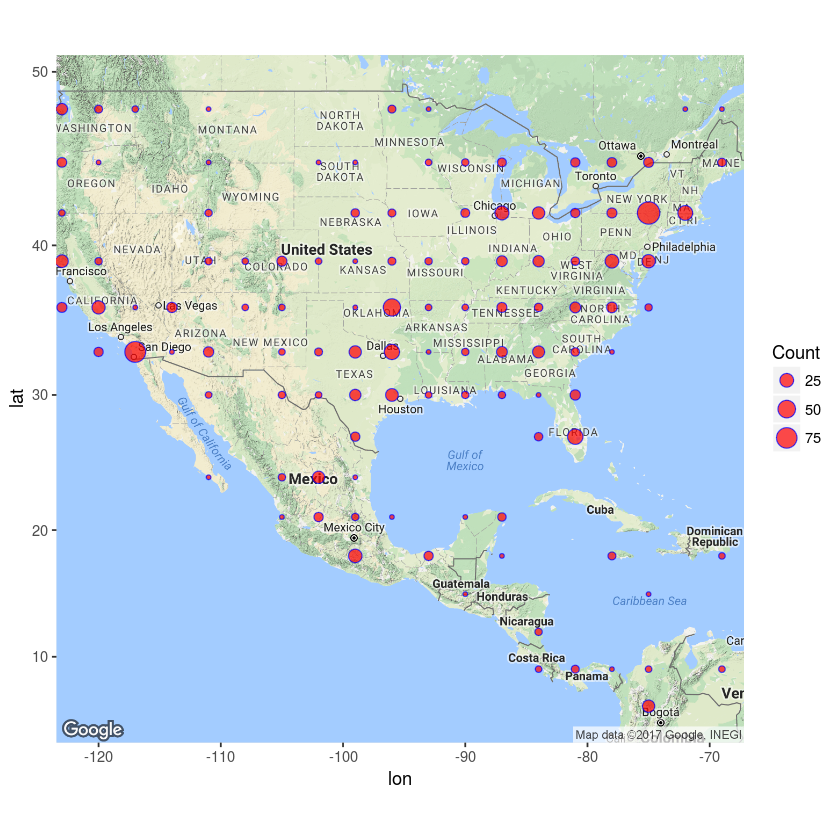

In [270]:
finalMapData

References:
https://sarahleejane.github.io/learning/r/2014/09/21/plotting-data-points-on-maps-with-r.html